# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 3*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 3
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to make some visualisations on the dataset that you worked with in the previous assignments.

### DEADLINE FOR THIS ASSIGNMENT IS 15 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [21]:
# YOUR CODE HERE
# import libraries
from matplotlib import pyplot as plt
from matplotlib import ticker
import plotly_express as px
import plotly.graph_objects as go
import geopandas as gpd
import seaborn as sns
import pandas as pd
import time

## Activities changes

Use the dataset that you have been working on in the previous assignments. Pick either a city or a province, then recreate the diagram for one of the activities, similar to those that are shown in [Google mobility reports](https://www.gstatic.com/covid19/mobility/2021-09-28_AW_Mobility_Report_en.pdf) or as below.

<img src="Images/Transit_changes.png" alt="drawing" width="600"/>

### Remarks:
- Create readable graphs by providing appropriate ticks, labels, titles, colorbars, legends
- [Hint] A possible [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between) to fill areas between lines
- [Optional] If you are ambitous, you can use subplots to also include the left part of the figure, which shows the percentages as below
 <img src="Images/Transit_changes_text.png" alt="drawing" width="200"/>

<ipython-input-2-4ab9992be65d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province_selected['date2'] = date2     # Adding an extra colunm date2.


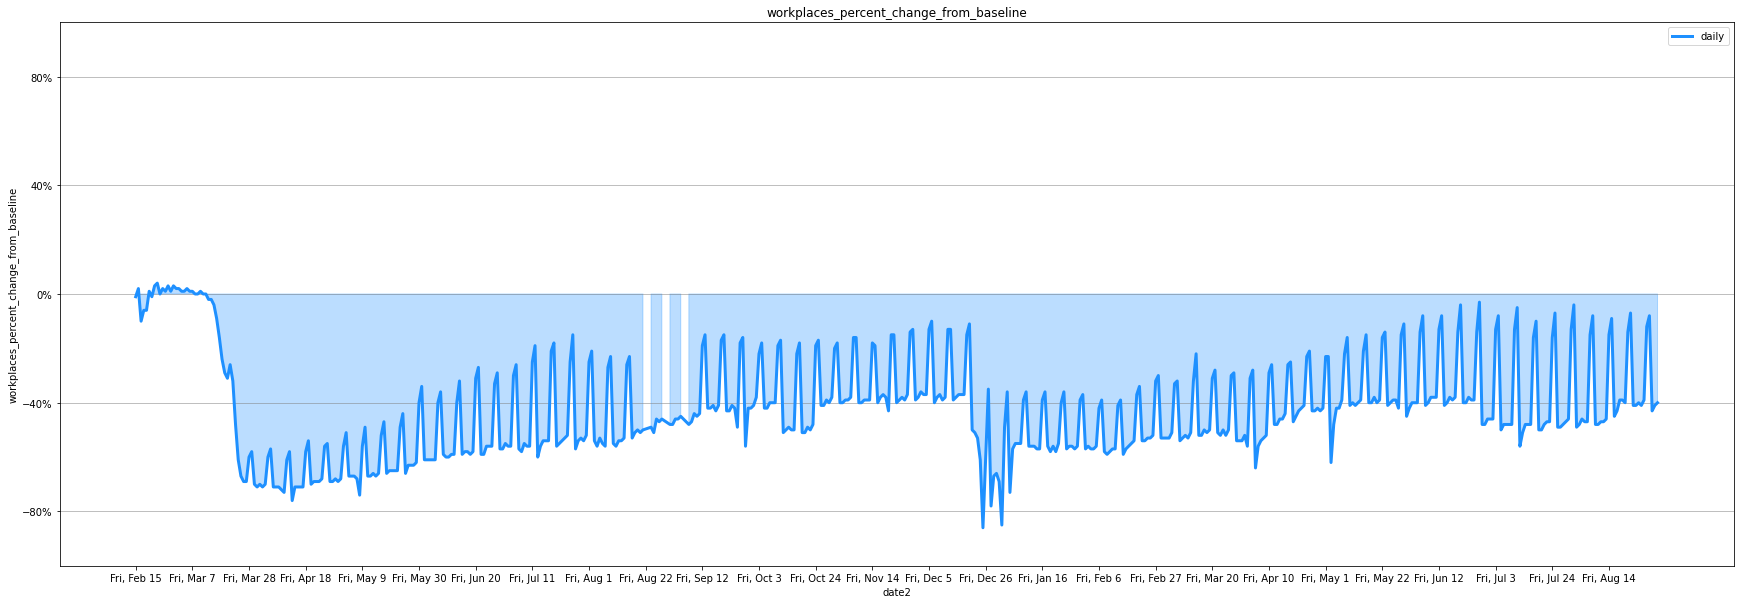

In [2]:
# Getting the data for plot.
file_path = 'D:\TUD\MSc1q1\TIL6010 TIL Programming\Assignment1\Region_Mobility_Report_CSVs\GB_province.csv'
df_province = pd.read_csv(file_path) 

df_province_selected = df_province.loc[df_province['sub_region_1'] == 'Aberdeen City']    # Choosing a city and getting the dataframe.
df_province_selected.reset_index(drop=True,inplace=True)   # Reorder the index.

date1 =df_province_selected['date']       # Obtaining string dates.
date2 = pd.to_datetime(date1)    # Converting to timestamp type.
df_province_selected['date2'] = date2     # Adding an extra colunm date2.


####
# Here we prepare some dictionaries for the format of the xticks
weekday_dict = {
  1: "Mon",
  2: "Tue",
  3: "Wed",
  4: "Thu",
  5: "Fri",
  6: "Sat",
  0: "Sun"
}

month_dict = {
  1: "Jan",
  2: "Feb",
  3: "Mar",
  4: "Apr",
  5: "May",
  6: "Jun",
  7: "Jul",
  8: "Aug",
  9: "Sep",
  10: "Oct",
  11: "Nov",
  12: "Dec"
}


####
# Here we prepare some lists to store the converted format of xticks, e.g. from original '2021-2-15' to desired 'Fri, Feb 15'.  
month_list = []
date_list = []
weekday_list = []
xlabel_list = []
xlabel_index = []


####
# Here is a loop to get the month names by characters and day date.
for i in date1:                             # Instead of using timestamp type from date2, here we use string type dates for convenience.
    split_i = i.split('/')                  # Split the string by '/' and get a list for each date.
    
    month_i = split_i[1]                    # The month number is the second element of each date's list.
    month_name = month_dict[int(month_i)]       # Using month dictionary to find the corresponding name of month.
    month_list.append(month_dict[int(month_i)]) # Store it.
    
    date_i = split_i[2]                     # The day date is the third element of each date's list.
    date_list.append(date_i)                # Store it.

    
####
# Here is a loop to get the weekday name of each day.
for j in date2:                            # Here we use timestamp type dates from date2 for convenience. 
    weekday_j = j.weekday()                # Get the weekday number.                  
    weekday_name = weekday_dict[weekday_j] # Using weekday dictionary to find the corresponding name.
    weekday_list.append(weekday_name)      # Store it
    

####
# Here is a loop we attach weekday element, month element and day element into one string which is used as the xticks.
for k in range(0,len(weekday_list),21):   # Here we use step of 21 to let the xticks for every three weeks.  
    xlabel_name = '{}, {} {}'.format(weekday_list[k], month_list[k], date_list[k]) # Convert into one string. 
    xlabel_list.append(xlabel_name)       # Store the string.
    xlabel_index.append(date2[k])         # Store the timestamp


####
# Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(30,10))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date2', y='workplaces_percent_change_from_baseline', data=df_province_selected, label='daily',linewidth=3,
             color='#1E90FF', ax=ax)
ax.yaxis.grid(linewidth=1, color='gray', alpha=0.5)

# Code to change the timestamp xticks into string xticks.
plt.xticks(xlabel_index, xlabel_list)

# Code to format the y axis.
plt.ylim(-100,100)                 # The range is from -100 to 100.
plt.yticks(range(-80,100,40))      # Code to yticks.
ax.yaxis.set_major_formatter(ticker.PercentFormatter())    # Conver yticks into percentage type.


# Code to fill between lineplot and x axis.
ax.fill_between(x='date2', y1='workplaces_percent_change_from_baseline', y2=0, data=df_province_selected, color='#1E90FF', alpha=0.3)

plt.show()


## Multiple lines in the same plot

In the previous question, you created a figure for a single city/province. Now, include multiple cities or provinces in a single figure. This time, make the diagram interactive, such as being be to select/deselect particular cities/provinces.


### Remarks

- You donot need to fill areas between the lines for the multiple lines plot here
- [Hint] If you are to use plotly express, you can use `color` argument in [px.line](https://plotly.com/python-api-reference/generated/plotly.express.line)


In [23]:
# Getting the data for plot.

df_province_selected2 = df_province.loc[df_province['sub_region_1'] == 'Bedford']    # Choosing second city and getting the dataframe.
df_province_selected3 = df_province.loc[df_province['sub_region_1'] == 'Cardiff']    # Choosing third city and getting the dataframe.
df_all = pd.concat([df_province_selected1,df_province_selected2,df_province_selected3]) # Convert into one dataframe.
df_all.reset_index(drop=True,inplace=True)   # Reorder the index.

date1 =df_all['date']       # Obtaining string dates.
date2 = pd.to_datetime(date1)    # Converting to timestamp type.
df_all['date2'] = date2     # Adding an extra colunm date2.


fig = px.line(df_all, x='date2', y='workplaces_percent_change_from_baseline', color='sub_region_1')
fig.show()


## Geospatial choropleth

Visualise the percentage changes from the baseline at either city-level or province-level in a geographical map for a chosen day.

[Hint] Here is an example of municipal boundaries of Netherlands. You can download the municipal boundaries of Netherlands from this [link](https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json) and here is some [code](https://www.cbs.nl/en-gb/onze-diensten/open-data/statline-as-open-data/cartography) to read this file as well.

If you cannot find the boundary of your selected country. Feel free to use Netherlands data for this question.

DO NOT forget to label the appropriate axes for the visualisations

[Optional] Plot and animate for multiple days

Text(0.5, 1.0, 'workplaces_percent_change_from_baseline, 2021')

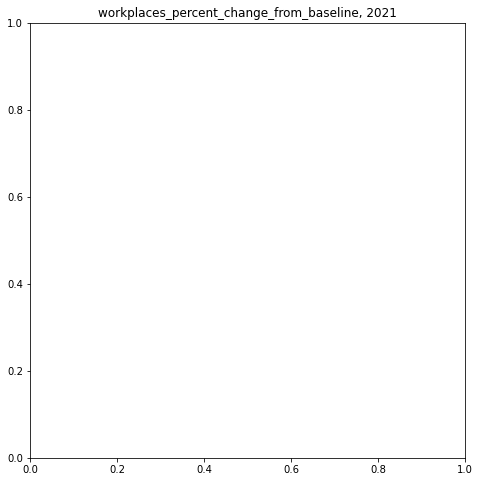

In [50]:
## Cant work because either the coding or the name could not correspond each other.
file_path = 'D:/TUD/MSc1q1/TIL6010 TIL Programming/Assignment1/Region_Mobility_Report_CSVs/2021_NL_Region_Mobility_Report.csv'
df_NL = pd.read_csv(file_path)

df_NL_province = df_NL[~df_NL['sub_region_1'].isna() & df_NL['sub_region_2'].isna()]
df_NL_province = df_NL_province.reset_index(drop = True)
 

df_NL_day = df_NL_province.loc[df_NL_province['date'] == '2021-01-01']


geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
bond = gpd.read_file(geodata_url)

municipal_boundaries = pd.merge(bond, df_whole, left_on = "statnaam", right_on = "sub_region_1")

p = municipal_boundaries.plot(column='workplaces_percent_change_from_baseline', 
                             figsize = (10,8))
p.axis('ON')
p.set_title('workplaces_percent_change_from_baseline, 2021')